# Exploratory Analysis for The Simpsons

## Frequency of Word Usage

In [1]:
# Import NLTK package for analysis, including word tokenizer (so words are separated, not characters)
import nltk
from nltk import word_tokenize

In [2]:
# Open cleaned text file as string
spoken_file = open('simpsons_script_fixed.txt', 'r').read()

In [3]:
# Tokenize into words
spoken_tokens = word_tokenize(spoken_file)

In [4]:
# Import NLTK frequency distribution package
from nltk.probability import FreqDist

In [5]:
# Obtain frequencies of word usage and print top 25
spoken_dist = FreqDist(spoken_tokens)
spoken_dist.most_common(25)

[('the', 42314),
 ('you', 37446),
 ('i', 35840),
 ('a', 31722),
 ('to', 31193),
 ('and', 19644),
 ('of', 16600),
 ('it', 14327),
 ('in', 13236),
 ('that', 12768),
 ('my', 12725),
 ('is', 12461),
 ('this', 11713),
 ('me', 11162),
 ('your', 10473),
 ('for', 10234),
 ('im', 9439),
 ('on', 8608),
 ('we', 8262),
 ('oh', 8176),
 ('what', 7742),
 ('have', 7513),
 ('no', 7495),
 ('but', 7422),
 ('be', 7207)]

In [6]:
# Import NLTK stop word list
from nltk.corpus import stopwords

In [7]:
# Assign stop word list
stop_words = set(stopwords.words('english'))

In [8]:
# Filter stop words out of token list
filtered_spoken_tokens = [word for word in spoken_tokens if not word in stop_words]

In [9]:
# Obtain frequencies of word usage without stop words and print top 25
spoken_nosw_fdist = FreqDist(filtered_spoken_tokens)
spoken_nosw_fdist.most_common(25)

[('im', 9439),
 ('oh', 8176),
 ('well', 7031),
 ('dont', 6884),
 ('like', 6059),
 ('get', 5236),
 ('youre', 5042),
 ('know', 4730),
 ('one', 4705),
 ('got', 4629),
 ('homer', 4548),
 ('thats', 4490),
 ('hey', 4296),
 ('right', 4049),
 ('go', 3732),
 ('bart', 3732),
 ('na', 3325),
 ('ill', 3180),
 ('good', 3019),
 ('see', 3017),
 ('yeah', 2989),
 ('marge', 2942),
 ('think', 2846),
 ('little', 2808),
 ('want', 2779)]

In [10]:
# Import matplotlib and seaborn for displaying images, as well as pandas for dictionary conversion
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

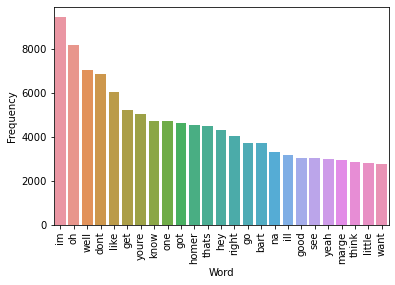

In [49]:
# Define top 25 words from frequency distribution
spoken_nosw_fdist_top25 = spoken_nosw_fdist.most_common(25)

# Convert to dictionary then series type
spoken_nosw_fdist_top25 = pd.Series(dict(spoken_nosw_fdist_top25))

# Create figure
spoken_nosw_fdist_top25_plot = sns.barplot(x=spoken_nosw_fdist_top25.index, 
                                           y=spoken_nosw_fdist_top25.values)

# Rotate x-axis labels
plt.xticks(rotation=90);

# Labels
plt.xlabel("Word")
plt.ylabel("Frequency")

# Save file
plt.savefig('top25words.eps', dpi=300)

In [12]:
# Define function for Lexical Diversity (Variation of Words)
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [13]:
# Calculate lexical diversity for filtered script
lexical_diversity(filtered_spoken_tokens)

0.0580570030292533

In [14]:
# Define Percentage Count function to return percentage of corpus occupied by word
def percentage(count, total):
    return 100 * count / total

In [15]:
# Calculate percentage of script occupied by protagonist, Homer
percentage(filtered_spoken_tokens.count("homer"),len(filtered_spoken_tokens))

0.5586798057150438

In [16]:
# Import packages for wordcloud generation
import wordcloud
from wordcloud import WordCloud

In [17]:
# Import re for substitution
import re

In [18]:
# Convert tokens back to string with no apostrophes or brackets
filtered_tokens_str = str(filtered_spoken_tokens)
filtered_tokens_str = re.sub(r'[^\w\s]','',filtered_tokens_str)

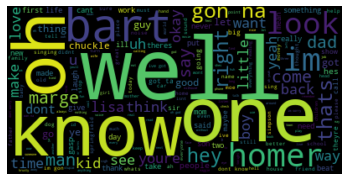

In [50]:
# Generate wordcloud using string
wordcloud = WordCloud().generate(filtered_tokens_str)

# Display wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save file
wordcloud.to_file('wordcloud_thesimpsons.eps')

## Mathematical Values

### Obtain Zipf distribution for The Simpsons

In [20]:
# Import operator package and itemgetter function to extract from list
import operator
from operator import itemgetter

In [21]:
# Create series from dictionary of all frequencies
spoken_nosw_fdist_series = pd.Series(dict(spoken_nosw_fdist))

In [22]:
# Initialise data frame columns
column_header = ['Rank', 'Frequency', 'Frequency * Rank', 'Probability']
zipf_df_ts = pd.DataFrame(columns = column_header)

In [23]:
# Convert series to collection
spoken_nosw_fdist_collection = sorted(spoken_nosw_fdist_series.items(),
                                      key = itemgetter(1), 
                                      reverse = True)

In [24]:
# Calculate Ranks by iterating through collection
rank = 1
for word, freq in spoken_nosw_fdist_collection:
    zipf_df_ts.loc[word] = [rank, freq, rank*freq, freq/len(filtered_spoken_tokens)]
    rank = rank + 1

In [25]:
# View data frame
zipf_df_ts.head()

,Rank,Frequency,Frequency * Rank,Probability
im,1.0,9439.0,9439.0,0.011595
oh,2.0,8176.0,16352.0,0.010043
well,3.0,7031.0,21093.0,0.008637
dont,4.0,6884.0,27536.0,0.008456
like,5.0,6059.0,30295.0,0.007443


### Obtain Zipf distribution for Moby Dick (General Corpus)

In [26]:
# Load in Moby Dick from Gutenberg corpus
import nltk
moby = nltk.corpus.gutenberg.words('melville-moby_dick.txt')

In [27]:
# Load in stop words and regex for substitution
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import re

In [28]:
# Remove stop words, grammar, make lowercase
moby_filtered = []
 
for w in moby:
    w = re.sub(r'[^\w\s]','',w)
    if w not in stop_words:
        moby_filtered.append(w.lower())

In [29]:
# Remove empty strings
while("" in moby_filtered) :
    moby_filtered.remove("")

In [30]:
# Import tokenizer
from nltk import word_tokenize

In [31]:
# Tokenize
moby_tokens = []

for w in moby_filtered:
    moby_tokens.append(word_tokenize(str(w)))

In [32]:
# Import frequency distribution
from nltk.probability import FreqDist

In [33]:
# Calculate word frequencies and print top 10
moby_fdist = FreqDist(moby_filtered)
moby_fdist.most_common(10)

[('i', 2124),
 ('whale', 1226),
 ('one', 921),
 ('the', 710),
 ('but', 705),
 ('like', 647),
 ('upon', 566),
 ('man', 527),
 ('ship', 518),
 ('ahab', 511)]

In [34]:
# Create series from dictionary of all frequencies
mb_fdist_series = pd.Series(dict(moby_fdist))

In [35]:
# Initialise data frame columns
column_header = ['Rank', 'Frequency', 'Frequency * Rank', 'Probability']
zipf_df_mb = pd.DataFrame(columns = column_header)

In [36]:
# Convert series to collection
mb_fdist_collectiion = sorted(mb_fdist_series.items(),
                                      key = itemgetter(1), 
                                      reverse = True)

In [37]:
# Calculate Ranks by iterating through collection
rank = 1
for word, freq in mb_fdist_collectiion:
    zipf_df_mb.loc[word] = [rank, freq, rank*freq, freq/len(moby_tokens)]
    rank = rank + 1

In [38]:
# View data frame
zipf_df_mb.head()

,Rank,Frequency,Frequency * Rank,Probability
i,1.0,2124.0,2124.0,0.017837
whale,2.0,1226.0,2452.0,0.010296
one,3.0,921.0,2763.0,0.007734
the,4.0,710.0,2840.0,0.005962
but,5.0,705.0,3525.0,0.005920


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


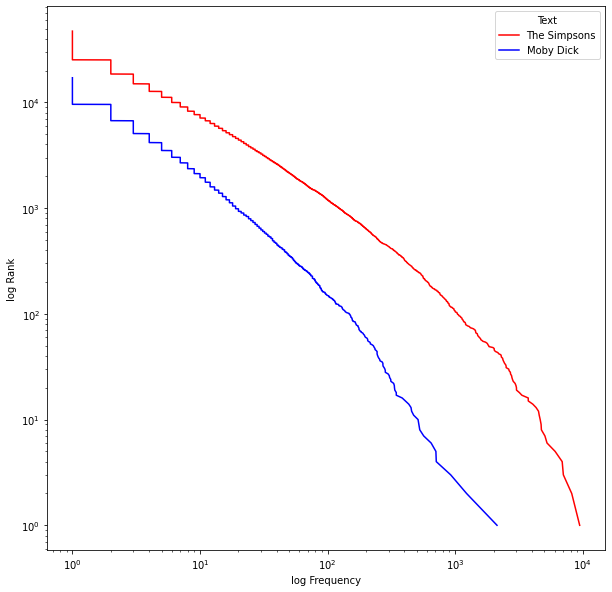

In [39]:
# Plot Zipf's Law for both
# Increase resolution
plt.figure(figsize=(10,10))

# Log-Log plot
plt.loglog(zipf_df_ts['Frequency'],zipf_df_ts['Rank'], label = "The Simpsons", color = "red")
plt.loglog(zipf_df_mb['Frequency'],zipf_df_mb['Rank'], label = "Moby Dick", color = "blue")

# Axis labels and legend
plt.ylabel("log Rank")
plt.xlabel("log Frequency")
plt.legend(title='Text')

# Save figure
plt.savefig('zipfs.eps', dpi=300)

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


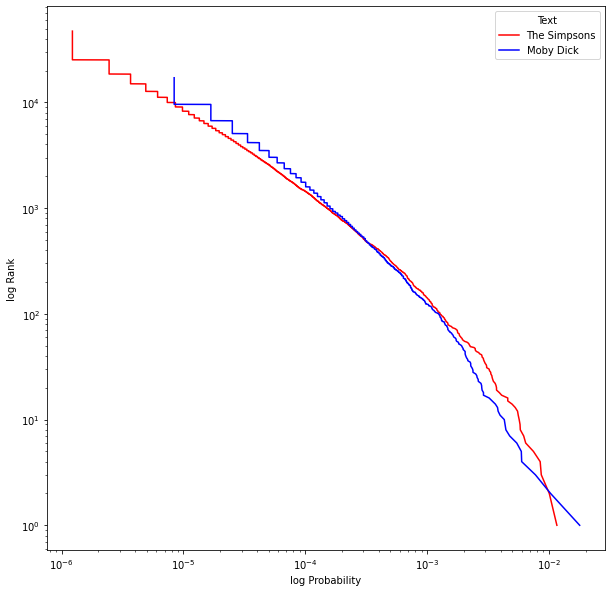

In [40]:
# Plot Zipf's Law for both (probability)
# Increase resolution
plt.figure(figsize=(10,10))

# Log-Log plot
plt.loglog(zipf_df_ts['Probability'],zipf_df_ts['Rank'], label = "The Simpsons", color = "red")
plt.loglog(zipf_df_mb['Probability'],zipf_df_mb['Rank'], label = "Moby Dick", color = "blue")

# Axis labels and legend
plt.ylabel("log Rank")
plt.xlabel("log Probability")
plt.legend(title='Text')

# Save figure
plt.savefig('zipfs_prob.eps', dpi=300)

plt.show()

### Comparing Entropy

In [41]:
# Import math package for entropy and numpy
import math
import numpy as np

In [42]:
# Calculate entropy for The Simpsons
entropy_ts = 0

for i in range(len(zipf_df_ts.index)):
    prob = zipf_df_ts.iloc[i][3]
    entropy_ts = entropy_ts - prob*math.log2(prob)

print(entropy_ts)   

11.792820441563844


In [43]:
# Calculate entropy for Moby Dick
entropy_mb = 0

for i in range(len(zipf_df_mb.index)):
    prob = zipf_df_mb.iloc[i][3]
    entropy_mb = entropy_mb - prob*math.log2(prob)

print(entropy_mb)   

11.921478188895518


### Heap's Law

In [45]:
# Create function calculating running tally of unique words
def countwords(listofwords): 
    # Initialise counter, vector, dictionary
    counter = 0
    counts = []
    dic = {}  
    
    # Iterate through word list
    for item in listofwords:  
        if item in dic:  
            # If item is already in dictionary, add 1 to its frequency
            dic[item] += 1  
            # Keep record of count of unique words
            counts.append(counter)
        else:  
            # If not, initialise frequency at 1
            dic[item] = 1  
            # Update counter and keep record
            counter += 1
            counts.append(counter)

    return counts

In [46]:
# Calculate unique word tally for The Simpsons
simpsons_unique_tally = countwords(filtered_spoken_tokens)

In [47]:
# Calculate unique word tally for Moby Dick
mb_unique_tally = countwords(moby_filtered)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


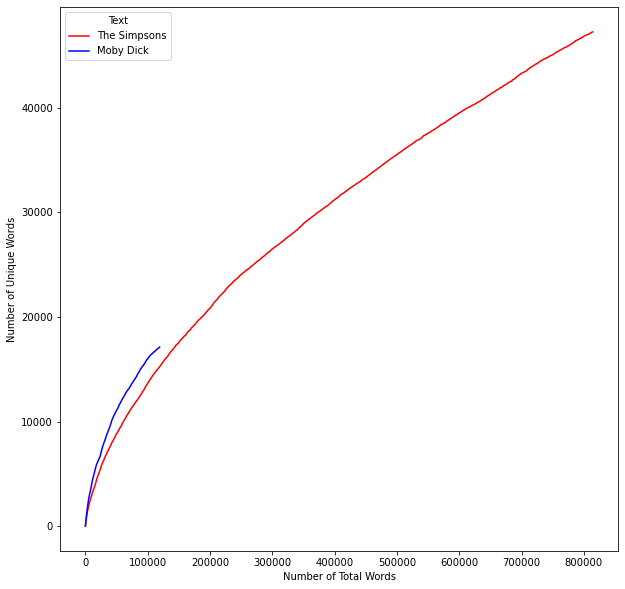

In [48]:
# Plot Heaps' Law for both
# Increase resolution
plt.figure(figsize=(10,10))

# Log-Log plot
plt.plot(range(len(simpsons_unique_tally)), simpsons_unique_tally, label = "The Simpsons", color = "red")
plt.plot(range(len(mb_unique_tally)), mb_unique_tally,  label = "Moby Dick", color = "blue")

# Axis labels and legend
plt.ylabel("Number of Unique Words")
plt.xlabel("Number of Total Words")
plt.legend(title='Text')

# Save figure
plt.savefig('heaps.eps', dpi=300)

plt.show()